# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# read dataset

In [2]:
dfs = pd.read_excel('example.xlsx')

# analyse data

In [3]:
print("\nnumber of samples : " , dfs.count().max())
print(dfs.columns)


number of samples :  9913
Index(['Unnamed: 0', 'Reference', 'Analysis', 'Design', 'Coding', 'github',
       'Testing', 'Results', 'Report', 'Presentation', 'Proposal',
       'NumOfMeetings', 'Evaluation'],
      dtype='object')


In [4]:
dfs.head()

,Unnamed: 0,Reference,Analysis,Design,Coding,github,Testing,Results,Report,Presentation,Proposal,NumOfMeetings,Evaluation
0,0,44,50,1,57,67,81,43,60,97,67,90,one
1,1,22,38,2,24,45,9,65,17,8,5,30,three
2,2,17,35,0,50,59,19,31,12,27,12,10,one
3,3,17,98,61,9,8,4,0,21,63,63,10,one
4,4,8,9,10,7,59,42,23,6,49,83,80,two


In [5]:
print("The number of samples in the class 'red' : " , dfs['Evaluation'][dfs['Evaluation'] == 'one'].count())
print("The number of samples in the class 'orange' : " , dfs['Evaluation'][dfs['Evaluation'] == 'two'].count())
print("The number of samples in the class 'green' : " , dfs['Evaluation'][dfs['Evaluation'] == 'three'].count())

The number of samples in the class 'red' :  3371
The number of samples in the class 'orange' :  3321
The number of samples in the class 'green' :  3221


# preprocessing

In [6]:
dfs = dfs.drop(['Unnamed: 0'], axis=1)

In [7]:
dfs.head()

,Reference,Analysis,Design,Coding,github,Testing,Results,Report,Presentation,Proposal,NumOfMeetings,Evaluation
0,44,50,1,57,67,81,43,60,97,67,90,one
1,22,38,2,24,45,9,65,17,8,5,30,three
2,17,35,0,50,59,19,31,12,27,12,10,one
3,17,98,61,9,8,4,0,21,63,63,10,one
4,8,9,10,7,59,42,23,6,49,83,80,two


In [8]:
X = dfs.drop(['Evaluation'], axis=1)
y = dfs['Evaluation']

#### Data Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9, random_state=42)
X_train, X_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True)
y_train, y_test = y_train.reset_index(drop=True), y_test.reset_index(drop=True)
# X_train, X_test, X_valid = X_train.reset_index(drop=True), X_test.reset_index(drop=True), X_valid.reset_index(drop=True)
# y_train, y_test, y_valid = y_train.reset_index(drop=True), y_test.reset_index(drop=True), y_valid.reset_index(drop=True)

# building and training model

In [10]:
from sklearn.svm import SVC

svm = SVC(decision_function_shape='ovo')

# svm = SVC(c=2 , kernel='linear')

svm.fit(X_train , y_train)
print("Test score: {:.2f}".format(svm.score(X_test , y_test)))


Test score: 0.35


# Validation

البحث عن قيم الباراميترات الأفضل للشبكة العصبونية باستخدام طريقة GridSearch .

و استخدام طريقة التقييم Fold cross validation-5 لتقسيم البيانات

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'decision_function_shape': ['ovo' , 'ovr'] ,'kernel': ['rbf' , 'poly'], 'C': [1, 2 , 4 , 6]}

grid_search = GridSearchCV(estimator= SVC() , param_grid= param_grid , cv=3, scoring='accuracy', verbose=3)

In [12]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.340 total time=   6.7s
[CV 2/3] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.336 total time=   4.9s
[CV 3/3] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.345 total time=   3.9s
[CV 1/3] END C=1, decision_function_shape=ovo, kernel=poly;, score=0.335 total time=   4.6s
[CV 2/3] END C=1, decision_function_shape=ovo, kernel=poly;, score=0.340 total time=   5.7s
[CV 3/3] END C=1, decision_function_shape=ovo, kernel=poly;, score=0.350 total time=   5.4s
[CV 1/3] END C=1, decision_function_shape=ovr, kernel=rbf;, score=0.340 total time=   5.1s
[CV 2/3] END C=1, decision_function_shape=ovr, kernel=rbf;, score=0.336 total time=   4.9s
[CV 3/3] END C=1, decision_function_shape=ovr, kernel=rbf;, score=0.345 total time=   4.5s
[CV 1/3] END C=1, decision_function_shape=ovr, kernel=poly;, score=0.335 total time=   5.4s
[CV 2/3] END C=1, decisio

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 2, 4, 6],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=3)

عرض قيم الباراميترات الأفضل وعرض دقتها وفقا لعملية البحث ثم اعادة تدريب الشبكة على هذه القيم و عرض دقتها النهائية وعرض مخطط دقتها في كل طور.

In [13]:
print("Best of Hyper Parameter :" , grid_search.best_params_, "\nScore : " , grid_search.best_score_)

Best of Hyper Parameter : {'C': 4, 'decision_function_shape': 'ovo', 'kernel': 'poly'} 
Score :  0.3489290066587561


In [14]:
svm2 = grid_search.best_estimator_.fit(X_train,y_train)
print("Test score: {:.2f}".format(svm2.score(X_test, y_test)))

Test score: 0.35


تقييم النموذج الأفضل وفقا للمقاييس: ,matrix confusion
.classification report

In [15]:
from sklearn.metrics import confusion_matrix

ypred = svm2.predict(X_test)
cm = confusion_matrix(y_test, ypred)

print("confusion_matrix(ytest, ypred): \n", cm)

confusion_matrix(ytest, ypred): 
 [[392 114 155]
 [367 127 151]
 [404 104 169]]


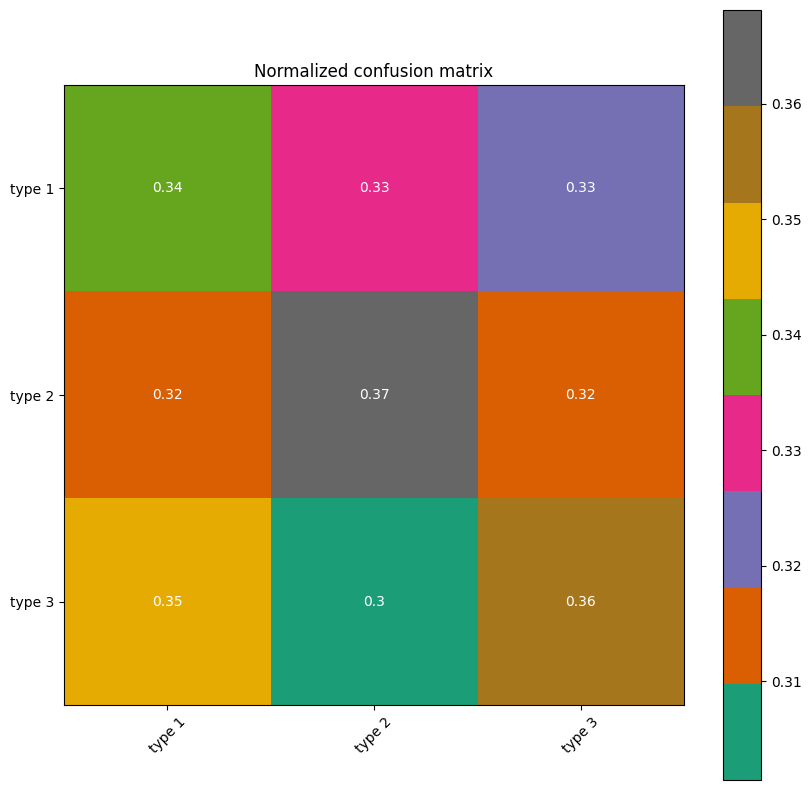

In [16]:
classes = ['type 1', 'type 2' , 'type 3']
cm = cm/np.sum(cm,axis=0)
tick_marks = np.arange(3)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Dark2)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes);

classification report

In [17]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, ypred))

Classification Report:
               precision    recall  f1-score   support

         one       0.34      0.59      0.43       661
       three       0.37      0.20      0.26       645
         two       0.36      0.25      0.29       677

    accuracy                           0.35      1983
   macro avg       0.35      0.35      0.33      1983
weighted avg       0.35      0.35      0.33      1983

